<a href="https://colab.research.google.com/github/yogesh1000/SCARA/blob/master/obstacledetection_scara_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
from google.colab import files
uploaded = files.upload()
# unzip to a local directory
local_zip = './train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./training')
zip_ref.close()
from google.colab import files
uploaded = files.upload()
# unzip to a local directory
local_zip = './test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./testing')
zip_ref.close()


Saving train.zip to train.zip


Saving test.zip to test.zip


Cloning into 'models'...
remote: Enumerating objects: 2426, done.
remote: Counting objects: 100% (2426/2426), done.
remote: Compressing objects: 100% (2025/2025), done.
remote: Total 2426 (delta 580), reused 1393 (delta 373), pack-reused 0
Receiving objects: 100% (2426/2426), 30.79 MiB | 38.64 MiB/s, done.
Resolving deltas: 100% (580/580), done.
Processing /content/models/research
     |████████████████████████████████| 9.0MB 12.7MB/s 
     |████████████████████████████████| 358kB 57.7MB/s 
     |████████████████████████████████| 1.1MB 53.2MB/s 
     |████████████████████████████████| 17.7MB 214kB/s 
     |████████████████████████████████| 829kB 59.0MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 153kB 51.7MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 2.2MB 46.8MB/s 
     |████████████████████████████████| 706kB 57.6MB/s 
     |████████████████████████████████| 174kB 65.0MB/s 
  

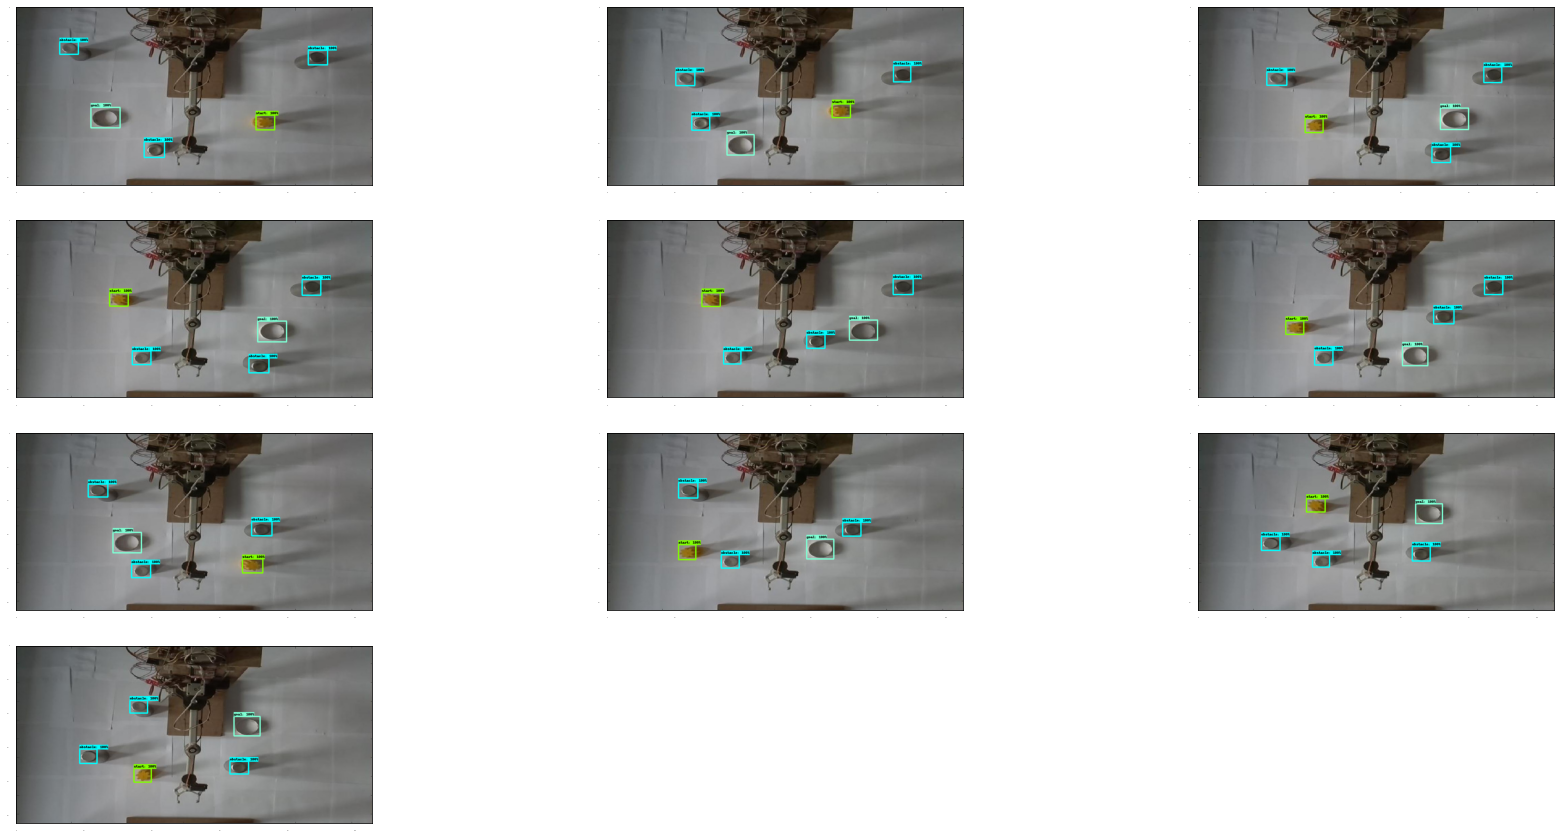

In [ ]:
#@title
# uncomment the next line if you want to delete an existing models directory
!rm -rf ./models/

# clone the Tensorflow Model Garden
!git clone --depth 1 https://github.com/tensorflow/models/
# install the Object Detection API
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .
import matplotlib
import matplotlib.pyplot as plt

import os
import random

import io
import scipy.misc
import numpy as np

import glob
import imageio
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
### START CODE HERE (Replace Instances of `None` with your code) ###
%cd models/research/object_detection/
# import the label map utility module
from utils import label_map_util

# import module for reading and updating configuration files.
from utils import config_util

# import module for visualization. use the alias `viz_utils`
from utils import visualization_utils as viz_utils

# import module for building the detection model
from builders import model_builder
### END CODE HERE ###

# import module for utilities in Colab
from object_detection.utils import colab_utils
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
    
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:

        plt.imshow(image_np_with_annotations)
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
   
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:
        plt.imshow(image_np_with_annotations)


%matplotlib inline

### START CODE HERE (Replace Instances of `None` with your code) ###

# assign the name (string) of the directory containing the training images
train_image_dir = './training'

# declare an empty list
train_images_np = []

# run a for loop for each image
for i in range(1, 11): # @REPLACE for i in range(None, None)

    # define the path (string) for each image
    image_path = os.path.join('/content/training/'+str(i)+'.jpg')
    #print(image_path)

    # load images into numpy arrays and append to a list
    train_images_np.append(load_image_into_numpy_array(image_path))
### END CODE HERE ###

# configure plot settings via rcParams
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

# plot images
#for idx, train_image_np in enumerate(train_images_np):
 #   plt.subplot(2,5 , idx+1)
  #  plt.imshow(train_image_np)

#plt.show()
# Option 1: draw your own ground truth boxes
# Define the list of ground truth boxes
gt_boxes = []
# annotate the training images
#colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)
gt_boxes=[
          np.array([[0.60866666, 0.67428571, 0.68866666, 0.72666667],
        [0.24366666, 0.82      , 0.32366666, 0.8752381 ],
        [0.19866666, 0.12285714, 0.26533333, 0.1752381 ],
        [0.75866666, 0.35904762, 0.84366666, 0.41714286],
        [0.56533333, 0.20952381, 0.677     , 0.29333333]]),
 np.array([[0.54533333, 0.63238095, 0.62033333, 0.6847619 ],
        [0.33033333, 0.8047619 , 0.42033333, 0.85428571],
        [0.36533333, 0.19333333, 0.44033333, 0.24666667],
        [0.61533333, 0.23714286, 0.69033333, 0.28857143],
        [0.71866666, 0.33619048, 0.83033333, 0.41428571]]),
 np.array([[0.62866666, 0.30095238, 0.70366666, 0.35238095],
        [0.337     , 0.80285714, 0.42366666, 0.85428571],
        [0.787     , 0.65619048, 0.872     , 0.71047619],
        [0.36533333, 0.19333333, 0.43866666, 0.24952381],
        [0.56866666, 0.68      , 0.687     , 0.76095238]]),
 np.array([[0.41533333, 0.26285714, 0.48866666, 0.3152381 ],
        [0.742     , 0.32571429, 0.817     , 0.37904762],
        [0.78366666, 0.65428571, 0.86366666, 0.71142857],
        [0.342     , 0.80380952, 0.427     , 0.85619048],
        [0.57533333, 0.67809524, 0.68866666, 0.76      ]]),
 np.array([[0.41533333, 0.26571429, 0.49033333, 0.31809524],
        [0.74366666, 0.32666667, 0.81366666, 0.37619048],
        [0.65033333, 0.56095238, 0.72533333, 0.61333333],
        [0.337     , 0.80380952, 0.42366666, 0.86      ],
        [0.56866666, 0.68095238, 0.68033333, 0.76095238]]),
 np.array([[0.572     , 0.24571429, 0.647     , 0.29714286],
        [0.342     , 0.8047619 , 0.42366666, 0.85619048],
        [0.50866666, 0.66190476, 0.587     , 0.71904762],
        [0.73866666, 0.32666667, 0.81866666, 0.37904762],
        [0.71533333, 0.57428571, 0.82366666, 0.64571429]]),
 np.array([[0.71366666, 0.6352381 , 0.79033333, 0.69428571],
        [0.50366666, 0.66190476, 0.582     , 0.71904762],
        [0.29366666, 0.20285714, 0.36366666, 0.25809524],
        [0.74366666, 0.3247619 , 0.817     , 0.37809524],
        [0.56533333, 0.27238095, 0.677     , 0.35333333]]),
 np.array([[0.63366666, 0.2       , 0.717     , 0.25047619],
        [0.28533333, 0.20095238, 0.37033333, 0.2552381 ],
        [0.692     , 0.32      , 0.76366666, 0.37238095],
        [0.51033333, 0.66190476, 0.58366666, 0.71428571],
        [0.60366666, 0.56095238, 0.712     , 0.63714286]]),
 np.array([[0.37533333, 0.3047619 , 0.44866666, 0.35714286],
        [0.58866666, 0.17714286, 0.66366666, 0.23142857],
        [0.692     , 0.32190476, 0.75866666, 0.37047619],
        [0.64366666, 0.60190476, 0.72366666, 0.65333333],
        [0.40366666, 0.61142857, 0.51366666, 0.68666667]]),
 np.array([[0.69533333, 0.33142857, 0.77033333, 0.38095238],
        [0.312     , 0.31904762, 0.382     , 0.37047619],
        [0.58533333, 0.17809524, 0.66366666, 0.22761905],
        [0.65533333, 0.6       , 0.72366666, 0.65428571],
        [0.402     , 0.61238095, 0.51033333, 0.68571429]]),
 ]
 ### START CODE HERE (Replace instances of `None` with your code ###

# Assign the zombie class ID
start=1
obstacle=2
goal=3
# define a dictionary describing the zombie class

category_index = {start:{'id'  : start,'name': 'start'},
                  obstacle:{'id'  : obstacle, 'name': 'obstacle'},
                  goal:{'id':goal,'name':'goal'}}

# Specify the number of classes that the model will predict
num_classes = 3
### END CODE HERE ###
# The `label_id_offset` here shifts all classes by a certain number of indices;
# we do this here so that the model receives one-hot labels where non-background
# classes start counting at the zeroth index.  This is ordinarily just handled
# automatically in our training binaries, but we need to reproduce it here.

label_id_offset = 1
train_image_tensors = []

# lists containing the one-hot encoded classes and ground truth boxes
gt_classes_one_hot_tensors = []
gt_box_tensors = []

for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
    
    # convert training image to tensor, add batch dimension, and add to list
    train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(
        train_image_np, dtype=tf.float32), axis=0))
    
    # convert numpy array to tensor, then add to list
    gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
    
    # apply offset to to have zero-indexed ground truth classes
    zero_indexed_groundtruth_classes = tf.convert_to_tensor(
        np.array([1,2,2,2,3], dtype=np.int32) - label_id_offset)
    
    # do one-hot encoding to ground truth classes
    gt_classes_one_hot_tensors.append(tf.one_hot(
        zero_indexed_groundtruth_classes, num_classes))

print('Done prepping data.')
# give boxes a score of 100%
dummy_scores = np.array([1.0,1.0,1.0,1.0,1.0], dtype=np.float32)

# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(10):
    plt.subplot(4, 3, idx+1)
    plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      np.array([1,2,2,2,3], dtype=np.int32),
      dummy_scores, category_index)

plt.show()


In [ ]:
for idx in range(9):
    plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      np.array([1,2,2,2,3], dtype=np.int32),
      dummy_scores, category_index,figsize=(15, 20),image_name='/content/testing/gif_frame_'+ str(idx)+'.jpg')


In [ ]:
print(gt_boxes[0])

[[0.60866666 0.67428571 0.68866666 0.72666667]
 [0.24366666 0.82       0.32366666 0.8752381 ]
 [0.19866666 0.12285714 0.26533333 0.1752381 ]
 [0.75866666 0.35904762 0.84366666 0.41714286]
 [0.56533333 0.20952381 0.677      0.29333333]]


In [ ]:
#@title
### START CODE HERE ###
# Download the SSD Resnet 50 version 1, 640x640 checkpoint
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint test_data/
    
tf.keras.backend.clear_session()

from utils.config_util import get_configs_from_pipeline_file
### START CODE HERE ###
# define the path to the .config file for ssd resnet 50 v1 640x640
pipeline_config = "/content/models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config"

# Load the configuration file into a dictionary
configs = get_configs_from_pipeline_file(pipeline_config, config_override=None)
### START CODE HERE ###
# Read in the object stored at the key 'model' of the configs dictionary
model_config = configs['model']

### START CODE HERE ###
# Modify the number of classes from its default of 90
model_config.ssd.num_classes = num_classes

# Freeze batch normalization
model_config.ssd.freeze_batchnorm = True

### START CODE HERE (Replace instances of `None` with your code) ###
detection_model = model_builder.build(
      model_config=model_config, is_training=True)
### END CODE HERE ###
### START CODE HERE ###

tmp_box_predictor_checkpoint = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
    
### END CODE HERE
### START CODE HERE ###
tmp_model_checkpoint = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=tmp_box_predictor_checkpoint)

tmp_model_checkpoint = tf.compat.v2.train.Checkpoint(model=tmp_model_checkpoint)
          
        
### END CODE HERE ###
### START CODE HERE ###

checkpoint_path = '/content/models/research/object_detection/test_data/checkpoint/ckpt-0'

# Define a checkpoint that sets `model= None
checkpoint =tf.train.Checkpoint(model=tmp_model_checkpoint)

# Restore the checkpoint to the checkpoint path
tmp_model_checkpoint.restore(checkpoint_path).expect_partial()

### END CODE HERE ###
### START CODE HERE (Replace instances of `None` with your code)###

# use the detection model's `preprocess()` method and pass a dummy image
tmp_image, tmp_shapes =  detection_model.preprocess(tf.zeros([1, 640, 640, 3]))

# run a prediction with the preprocessed image and shapes
tmp_prediction_dict = detection_model.predict(tmp_image, tmp_shapes)

# postprocess the predictions into final detections
tmp_detections = detection_model.postprocess(tmp_prediction_dict, tmp_shapes)

### END CODE HERE ###
tf.keras.backend.set_learning_phase(True)

### START CODE HERE (Replace instances of `None` with your code)###

# set the batch_size
batch_size =4

# set the number of batches
num_batches = 200

# Set the learning rate
learning_rate = 0.01

# set the optimizer and pass in the learning_rate
optimizer = tf.keras.optimizers.SGD(
    learning_rate=learning_rate, momentum=0.9)
### START CODE HERE (Replace instances of `None` with your code) ###

# define a list that contains the layers that you wish to fine tune
to_fine_tune = []
for v in detection_model.trainable_variables:
  if v.name.startswith('WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead') or v.name.startswith('WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead') :
    to_fine_tune.append(v)

### END CODE HERE
### END CODE HERE ###
# Get a batch of your training images
g_images_list = train_image_tensors[0:2]
# Use .preprocess to preprocess an image
g_preprocessed_image = detection_model.preprocess(g_images_list[0])
preprocessed_image_list = []
true_shape_list = []

for img in g_images_list:
    processed_img, true_shape = detection_model.preprocess(img)
    preprocessed_image_list.append(processed_img)
    true_shape_list.append(true_shape)
    # Turn a list of tensors into a tensor
preprocessed_image_tensor = tf.concat(preprocessed_image_list, axis=0)
true_shape_tensor = tf.concat(true_shape_list, axis=0)
# Make predictions on the images
prediction_dict = detection_model.predict(preprocessed_image_tensor, true_shape_tensor)
# Get the ground truth bounding boxes
gt_boxes_list = gt_box_tensors[0:2]

# Get the ground truth class labels
gt_classes_list = gt_classes_one_hot_tensors[0:2]

# Provide the ground truth to the model
detection_model.provide_groundtruth(
            groundtruth_boxes_list=gt_boxes_list,
            groundtruth_classes_list=gt_classes_list)
# Calculate the loss after you've provided the ground truth 
losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)

# View the loss dictionary
losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)
# Let's just reset the model so that you can practice setting it up yourself!
detection_model.provide_groundtruth(groundtruth_boxes_list=[], groundtruth_classes_list=[])
# decorate with @tf.function for faster training (remember, graph mode!)
@tf.function
def train_step_fn(image_list,
                groundtruth_boxes_list,
                groundtruth_classes_list,
                model,
                optimizer,
                vars_to_fine_tune):
    """A single training iteration.

    Args:
      image_list: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """

    with tf.GradientTape() as tape:
    ### START CODE HERE (Replace instances of `None` with your code) ###

        # Preprocess the images
        preprocessed_image_list=[]
        true_shape_list=[]
        model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)

        for img in image_list:
          processed_img, true_shape = model.preprocess(img)
          preprocessed_image_list.append(processed_img)
          true_shape_list.append(true_shape)
           # @REPLACE

        preprocessed_image_tensor = tf.concat(preprocessed_image_list, axis=0)
        true_shape_tensor = tf.concat(true_shape_list, axis=0) 

        # Make a prediction
        prediction_dict = model.predict(preprocessed_image_tensor, true_shape_tensor)

        # Calculate the total loss (sum of both losses)
        
        losses_dict = model.loss(prediction_dict, true_shape_tensor)
        total_loss=losses_dict['Loss/localization_loss']+losses_dict['Loss/classification_loss']
        # Calculate the gradients
        gradients = tape.gradient(total_loss,vars_to_fine_tune)
        optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
        # Optimize the model's selected variables
        ### END CODE HERE ###
        
    return total_loss
print('Start fine-tuning!', flush=True)

for idx in range(num_batches):
    # Grab keys for a random subset of examples
    all_keys = list(range(len(train_images_np)))
    random.shuffle(all_keys)
    example_keys = all_keys[:batch_size]

    # Get the ground truth
    gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
    gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
    
    # get the images
    image_tensors = [train_image_tensors[key] for key in example_keys]

    # Training step (forward pass + backwards pass)
    total_loss = train_step_fn(image_tensors, 
                               gt_boxes_list, 
                               gt_classes_list,
                               detection_model,
                               optimizer,
                               to_fine_tune
                              )

    if idx % 10 == 0:
        print('batch ' + str(idx) + ' of ' + str(num_batches)
        + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')    

--2021-02-17 14:18:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.197.128, 2607:f8b0:400e:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.197.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   121MB/s    in 1.9s    

2021-02-17 14:18:55 (121 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Start fine-tuning!
batch 0 of 200, loss=1.5466325
batch 10 of 200, loss=0.5334904
batch 20 of 200, loss=0.26399747
batch 30 of 200, loss=0.22564948
batch 40 of 200, loss=0.16648138
batch 50 of 200, loss=0.14886245
batch 60 of 200, loss=0.1433166
batch 70 of 200, loss=0.1579182
batch 80 of 200, loss=0.13578299
batch 90 of 200, loss=0.11326447
batch 100 of 200, loss=0.11296196
batch 110 of 200, loss=0.10006109
batch 120 of 200, loss=0.09662846
batch 130 of 200, loss=0.096247494
batch 140 of 200, loss=0.09380839
batch 150 of 200, loss=0.08909921
batch 160 of 200, loss=0.08935938
batch 170 of 200, loss=0.08832742
batch 180 of 200, loss=0.08831309
batch 190 of 200, loss=0.0824379
Done fine-tuning!


In [ ]:
test_image_dir = './testing/'
test_images_np = []

# load images into a numpy array. this will take a few minutes to complete.
for i in range(11, 16):
    #image_path = os.path.join()
    image_path = os.path.join('/content/testing/'+str(i)+'.jpg')
    print(image_path)
    test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))

/content/testing/11.jpg
/content/testing/12.jpg
/content/testing/13.jpg
/content/testing/14.jpg
/content/testing/15.jpg


In [ ]:
# Again, uncomment this decorator if you want to run inference eagerly
@tf.function
def detect(input_tensor):
    """Run detection on an input image.

    Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

    Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
    """
    preprocessed_image, shapes = detection_model.preprocess(input_tensor)
    prediction_dict = detection_model.predict(preprocessed_image, shapes)
    
    ### START CODE HERE (Replace instances of `None` with your code) ###
    # use the detection model's postprocess() method to get the the final detections
    detections = detection_model.postprocess(prediction_dict, shapes)

    ### END CODE HERE ###
    
    return detections

In [ ]:
# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
results = {'boxes': [], 'scores': []}

for i in range(len(test_images_np)):
    input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
    detections = detect(input_tensor)
    plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name="/content/testing/gif_frame_" + ('%03d' % i) + ".jpg")
    results['boxes'].append(detections['detection_boxes'][0][0].numpy())
    results['scores'].append(detections['detection_scores'][0][0].numpy())

In [ ]:
# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
results = {'boxes': [], 'scores': []}

for i in range(5):
    input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
    detections = detect(input_tensor)
    print(detections['detection_scores'][0][0:5])
    print(detections['detection_boxes'][0][0:5])
    print(detections['detection_classes'][0][0:5]+1)
    print(' ')
    plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name="/content/testing/gif_frame_" + ('%03d' % i) + ".jpg")
    #a=detections['detection_boxes'][0].numpy()
    #b=detections['detection_classes'][0].numpy().astype(np.uint32)+ label_id_offset
    #c=detections['detection_scores'][0].numpy()
    
    results['boxes'].append(detections['detection_boxes'][0].numpy())
    results['scores'].append(detections['detection_scores'][0].numpy())

tf.Tensor([0.97454983 0.9017887  0.84366906 0.8351768  0.7338933 ], shape=(5,), dtype=float32)
tf.Tensor(
[[0.65275204 0.6056224  0.7632674  0.68398726]
 [0.58826107 0.1762242  0.66573375 0.22880593]
 [0.3145277  0.3173308  0.38714272 0.37003276]
 [0.3805476  0.64023906 0.46198836 0.69622606]
 [0.69072366 0.32810858 0.7709348  0.3815051 ]], shape=(5, 4), dtype=float32)
tf.Tensor([3. 2. 2. 2. 1.], shape=(5,), dtype=float32)
 
tf.Tensor([0.9681377  0.9151229  0.902656   0.80995035 0.8067113 ], shape=(5,), dtype=float32)
tf.Tensor(
[[0.6531061  0.6048274  0.7622826  0.68251395]
 [0.58754605 0.17470513 0.66599554 0.22802095]
 [0.6831678  0.35722306 0.75324714 0.40835097]
 [0.38060483 0.6430936  0.46073756 0.6967689 ]
 [0.42777628 0.26858768 0.49931347 0.31950083]], shape=(5, 4), dtype=float32)
tf.Tensor([3. 2. 2. 2. 1.], shape=(5,), dtype=float32)
 
tf.Tensor([0.9715532  0.9165047  0.88606673 0.834254   0.8113287 ], shape=(5,), dtype=float32)
tf.Tensor(
[[0.6528745  0.60497105 0.76319116 0

In [ ]:
x = np.array(results['scores'])

# percent of frames where a zombie is detected
zombie_detected = (np.where(x > 0.9, 1, 0).sum())/5*100
print(zombie_detected)

2.109704641350211


Frame 0


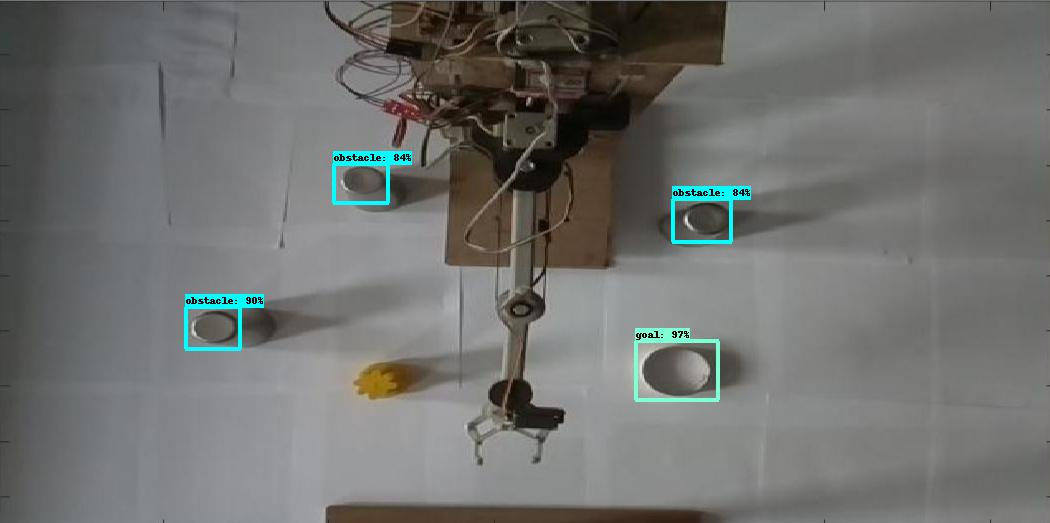


Frame 0


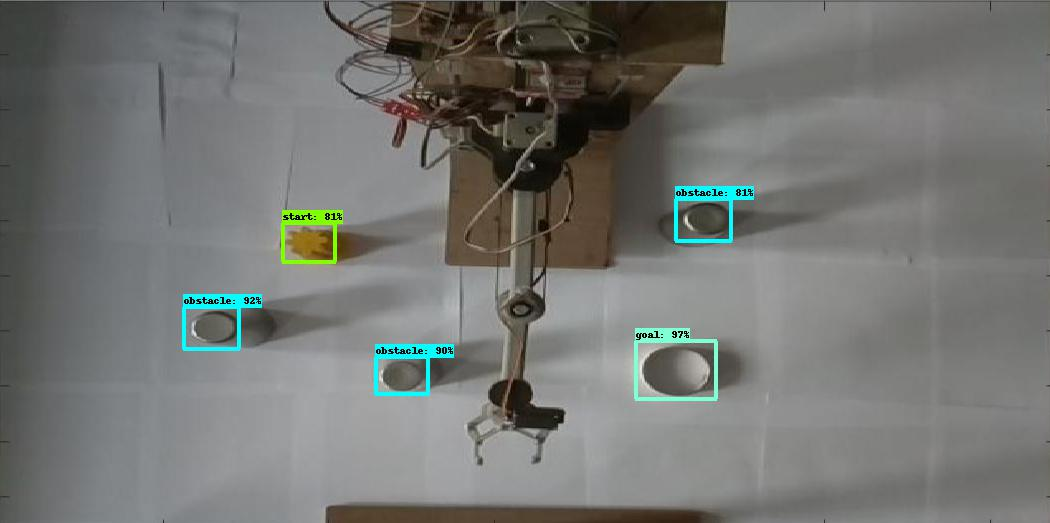


Frame 0


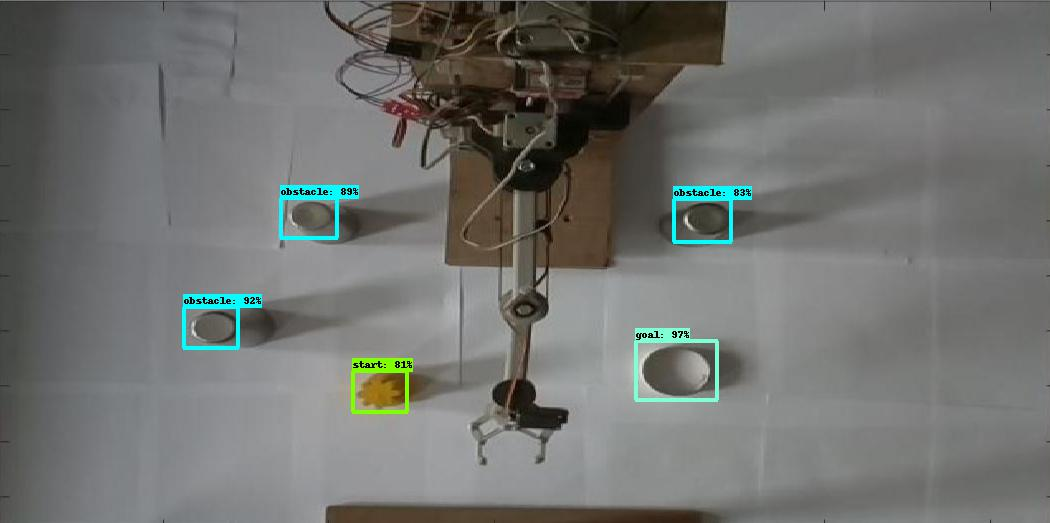


Frame 0


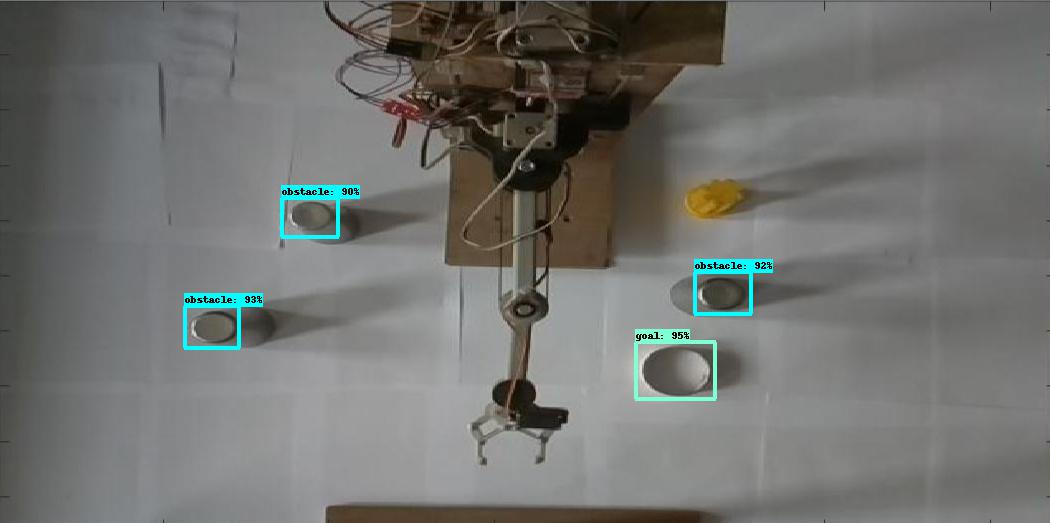


Frame 0


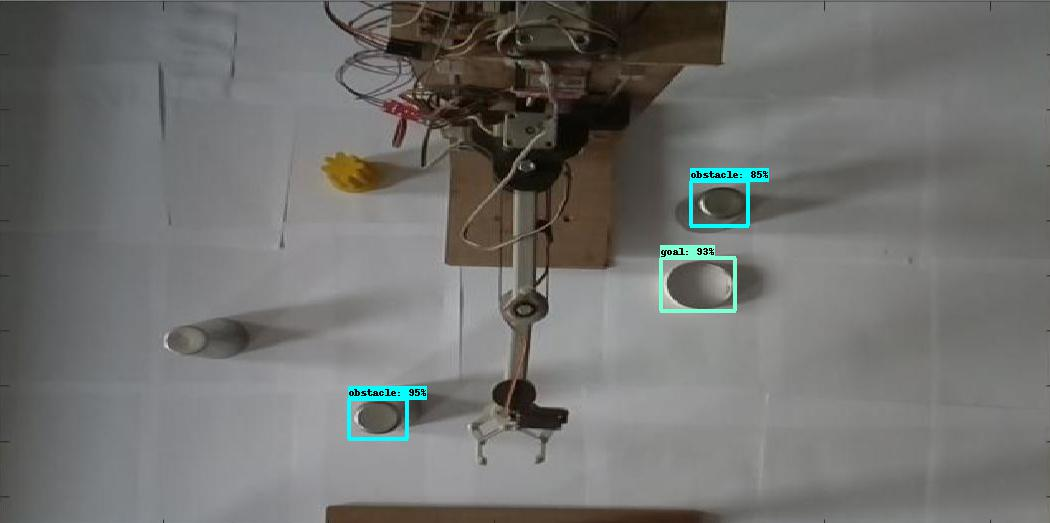

In [ ]:
for i in range(0,5):
  print('Frame 0')
  display(IPyImage('/content/testing/gif_frame_'+ ('%03d' % i) +'.jpg'))
  print()

